<a href="https://colab.research.google.com/github/fatima2020-lab/Simulacion-I/blob/main/TareaInventario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resolver por simulación es problema del inventario.

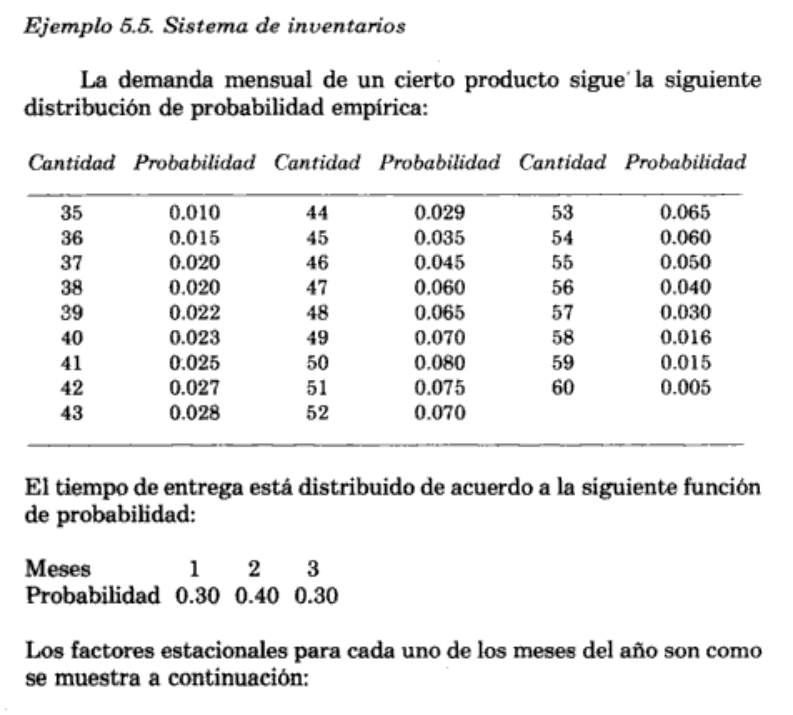

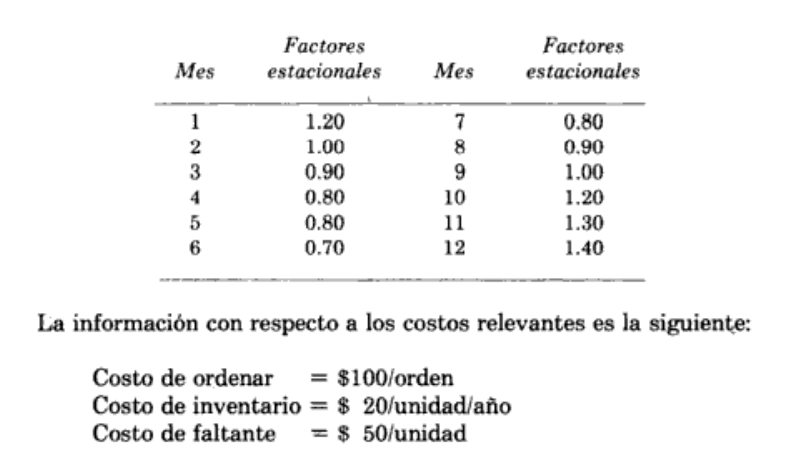

Si el Inventario inicial se asume en 150 unidades, determinar la cantdad optima a ordenar $(q)$ y el nivel óptimo de reorden $(R)$

**Solución por Simulación**

In [1]:
#Librerias

import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#Distribucion empirica de la demanda
demanda = np.array([ 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
    45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
    55, 56, 57, 58, 59, 60])

prob_demanda = np.array([0.010, 0.015, 0.020, 0.020, 0.022, 0.023,
    0.025, 0.027, 0.028, 0.029, 0.035, 0.045,
    0.060, 0.065, 0.070, 0.080, 0.075, 0.070,
    0.065, 0.060, 0.050, 0.040, 0.030, 0.016,
    0.015, 0.005])

# Tiempo de entrega
tiempos = [1, 2, 3]
prob_tiempos = [0.3, 0.4, 0.3]

# Factores estacionales de enero a diciembre
factores = [1.20, 1.00, 0.90, 0.80, 0.80, 0.70, 0.80, 0.90, 1.00, 1.20, 1.30, 1.40]

# Costos
costo_ordenar = 100
costo_inventario_anual = 20
costo_faltante = 50

# Inventario inicial
inventario_inicial_global = 150


In [3]:
#Generamos el codigo de la simulacion
from tabulate import tabulate
import numpy as np



def sim_inventario(q, R, meses=60):
    inventario = inventario_inicial_global
    pedidos = []
    costo_total = 0
    tabla_resultados = []
    meses_simulados = 12
    ordenes_realizadas=0
    meses_con_orden = []

    for mes in range(meses_simulados):
        mes_real = mes % 12
        estacional = factores[mes_real]
        aleatorio = np.random.rand()

        # Demanda ajustada con estacionalidad
        demanda_base = int(np.random.choice(demanda, p=prob_demanda)) #simulamos una demanda aleatoria del producto en un mes toamndo en cuenta los datos que ya establecimos
        demanda_ajustada = int(demanda_base * estacional)#lo usamos para calcular los costos y los inventarios dependiendo del mes

        # Recibir pedidos
        inventario += sum(c for t, c in pedidos if t == mes) #esta linea nos ayuda a filtrar los pedidos que deben llegar en el mes actual y los añade al inventario
        pedidos = [(t, c) for t, c in pedidos if t > mes] #filtramos la lista de pedidos que aun no llegan

        inventario_inicial_mes = inventario
        faltante = 0
        orden = 0

        # Satisfacer demanda
        if inventario >= demanda_ajustada:
            inventario -= demanda_ajustada
        else:
            faltante = demanda_ajustada - inventario
            inventario = 0

        # Reordenar si es necesario
        if inventario <= R:
            t_entrega = mes + np.random.choice(tiempos, p=prob_tiempos)#lo agregamos a una simulacion de tiempo para entregar el pedido
            pedidos.append((t_entrega, q)) #lista de pedidos pendientes
            orden = q
            costo_total += costo_ordenar  # costo por ordenar
            ordenes_realizadas += 1
            meses_con_orden.append(mes + 1)

        # Cálculo del inventario promedio mensual
        inventario_promedio = (inventario_inicial_mes + inventario) // 2

        # Costos mensuales
        costo_total += (inventario_promedio * costo_inventario_anual) / 12
        costo_total += faltante * costo_faltante

        # Guardar fila
        fila = [
            mes + 1,
            inventario_inicial_mes,
            round(aleatorio, 5),
            demanda_ajustada,
            inventario,
            faltante,
            orden if orden > 0 else '',
            inventario_promedio
        ]
        tabla_resultados.append(fila)



    return round(costo_total, 2), tabla_resultados, ordenes_realizadas, meses_con_orden


In [4]:

# Imprimimos los resultados

q = 200
R = 100

#costo, tabla, ordenes = sim_inventario(q, R)

costo, tabla, ordenes, meses_con_orden = sim_inventario(q, R)


encabezados = ["Mes", "Inv. Inicial", "Número Aleatorio",
    "Demanda Ajustada", "Inv. Final",
    "Faltante", "Orden", "Inv. Promedio"]
print("\nTabla mensual:")
print(tabulate(tabla, headers=encabezados, tablefmt="grid"))


print(f"\nÓrdenes realizadas: {ordenes}")
print(f"Costo total promedio anual = ${costo:,.2f}")


Tabla mensual:
+-------+----------------+--------------------+--------------------+--------------+------------+---------+-----------------+
|   Mes |   Inv. Inicial |   Número Aleatorio |   Demanda Ajustada |   Inv. Final |   Faltante | Orden   |   Inv. Promedio |
+=======+================+====================+====================+==============+============+=========+=================+
|     1 |            150 |            0.81692 |                 49 |          101 |          0 |         |             125 |
+-------+----------------+--------------------+--------------------+--------------+------------+---------+-----------------+
|     2 |            101 |            0.13061 |                 53 |           48 |          0 | 200     |              74 |
+-------+----------------+--------------------+--------------------+--------------+------------+---------+-----------------+
|     3 |             48 |            0.91235 |                 45 |            3 |          0 | 200     |   

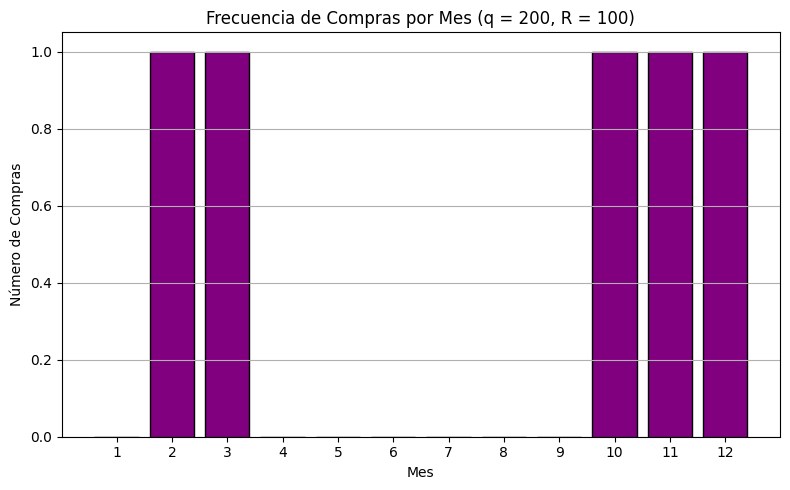

In [6]:
# Generamos la grafica  de la frecuencia de compras
plt.figure(figsize=(8, 5))
plt.hist(meses_con_orden, bins=range(1, 14), align='left', rwidth=0.8,color='purple', edgecolor='black')
plt.title("Frecuencia de Compras por Mes (q = 200, R = 100)")
plt.xlabel("Mes")
plt.ylabel("Número de Compras")
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.tight_layout()
plt.show()